In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

from sklearn import preprocessing
from xgboost import XGBClassifier

In [9]:
image = pd.read_csv("C:\Aalesh and Mandar\Datasets\Cases\Image Segmentation\Image_Segmention.csv")

In [10]:
image.head()

,Class,region.centroid.col,region.centroid.row,region.pixel.count,short.line.density.5,short.line.density.2,vedge.mean,vegde.sd,hedge.mean,hedge.sd,intensity.mean,rawred.mean,rawblue.mean,rawgreen.mean,exred.mean,exblue.mean,exgreen.mean,value.mean,saturation.mean,hue-mean
0,BRICKFACE,188,133,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
1,BRICKFACE,105,139,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
2,BRICKFACE,34,137,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
3,BRICKFACE,39,111,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773
4,BRICKFACE,16,128,9,0.0,0.0,0.500000,0.077778,0.666667,0.311111,5.555555,6.888889,6.666666,3.111111,4.000000,3.333333,-7.333334,7.111111,0.561508,-0.985811


In [11]:
x = image.drop(["Class"], axis=1)
y = image["Class"]

In [12]:
lebals = preprocessing.LabelEncoder()
le_y = lebals.fit_transform(y)
print(lebals.classes_)

['BRICKFACE' 'CEMENT' 'FOLIAGE' 'GRASS' 'PATH' 'SKY' 'WINDOW']


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, le_y, stratify = le_y, random_state = 2022, test_size = 0.3)

In [19]:
xgb = XGBClassifier(random_state = 2022)

xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
y_pred_prob = xgb.predict_proba(x_test)[:,1]
print(accuracy_score(y_test, y_pred))

0.9047619047619048


In [22]:
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 2022)
params = {"n_estimators":[50,100,150],
          "max_depth":[1,2,3,4],
          "learning_rate":[0.01,0.15,0.2,0.3]}
gcv = GridSearchCV(xgb, param_grid = params, verbose = 3, scoring = "neg_log_loss", cv = kfold)
gcv.fit(x, le_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=-1.409 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=-1.487 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=-1.400 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=-1.415 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=-1.453 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=1, n_estimators=100;, score=-1.131 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=1, n_estimators=100;, score=-1.250 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=1, n_estimators=100;, score=-1.104 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=1, n_estimators=100;, score=-1.133 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=1, n_estimators=100;, score

[CV 2/5] END learning_rate=0.15, max_depth=2, n_estimators=150;, score=-0.522 total time=   0.0s
[CV 3/5] END learning_rate=0.15, max_depth=2, n_estimators=150;, score=-0.244 total time=   0.0s
[CV 4/5] END learning_rate=0.15, max_depth=2, n_estimators=150;, score=-0.384 total time=   0.0s
[CV 5/5] END learning_rate=0.15, max_depth=2, n_estimators=150;, score=-0.206 total time=   0.0s
[CV 1/5] END learning_rate=0.15, max_depth=3, n_estimators=50;, score=-0.358 total time=   0.0s
[CV 2/5] END learning_rate=0.15, max_depth=3, n_estimators=50;, score=-0.491 total time=   0.0s
[CV 3/5] END learning_rate=0.15, max_depth=3, n_estimators=50;, score=-0.231 total time=   0.0s
[CV 4/5] END learning_rate=0.15, max_depth=3, n_estimators=50;, score=-0.310 total time=   0.0s
[CV 5/5] END learning_rate=0.15, max_depth=3, n_estimators=50;, score=-0.239 total time=   0.0s
[CV 1/5] END learning_rate=0.15, max_depth=3, n_estimators=100;, score=-0.362 total time=   0.0s
[CV 2/5] END learning_rate=0.15, ma

[CV 4/5] END learning_rate=0.2, max_depth=4, n_estimators=100;, score=-0.289 total time=   0.0s
[CV 5/5] END learning_rate=0.2, max_depth=4, n_estimators=100;, score=-0.195 total time=   0.0s
[CV 1/5] END learning_rate=0.2, max_depth=4, n_estimators=150;, score=-0.385 total time=   0.0s
[CV 2/5] END learning_rate=0.2, max_depth=4, n_estimators=150;, score=-0.546 total time=   0.0s
[CV 3/5] END learning_rate=0.2, max_depth=4, n_estimators=150;, score=-0.259 total time=   0.0s
[CV 4/5] END learning_rate=0.2, max_depth=4, n_estimators=150;, score=-0.292 total time=   0.0s
[CV 5/5] END learning_rate=0.2, max_depth=4, n_estimators=150;, score=-0.191 total time=   0.0s
[CV 1/5] END learning_rate=0.3, max_depth=1, n_estimators=50;, score=-0.320 total time=   0.0s
[CV 2/5] END learning_rate=0.3, max_depth=1, n_estimators=50;, score=-0.514 total time=   0.0s
[CV 3/5] END learning_rate=0.3, max_depth=1, n_estimators=50;, score=-0.196 total time=   0.0s
[CV 4/5] END learning_rate=0.3, max_depth=1

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=...
                                     max_cat_threshold=64, max_cat_to_onehot=4,
                                     max_delta_step=0, max_depth=6,
                                     max_leaves=0, min_child_weight=1,
                                     missing=nan, monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1,
                                     objective='multi:softprob',
                                     predictor='auto', ...),
             param_grid={'learning_rate': [0.01, 0.15, 0.2, 0.3],
                         'max_depth': [1, 2, 3, 4],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_log_loss', verbose=3)

In [23]:
print(gcv.best_params_)
print(gcv.best_score_)

{'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 50}
-0.3211610358245888


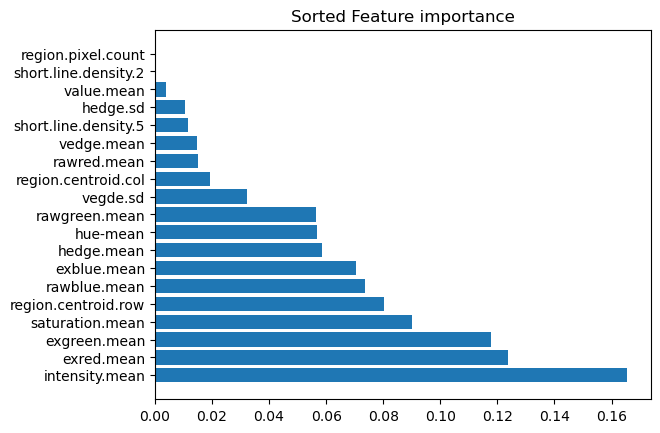

In [24]:
best_model = gcv.best_estimator_
imps = best_model.feature_importances_

i_sorted = np.argsort(-imps)
n_sorted = x.columns[i_sorted]
imp_sort = imps[i_sorted]
plt.barh(n_sorted, imp_sort)
plt.title("Sorted Feature importance")
plt.show()